# Lista 3

### Algorytmy i struktury danych

#### Urszula Spik i Natalia Jelito

In [89]:
import matplotlib.pyplot as plt

### Zadanie 1

Wzór na prawdopodbieństwo osiągnięcia co najwyżej k sukcesów możemy przekształcić do poniższej postaci
$$ P(n,k) = \sum\limits_{i=0}^k {n\choose i} p^i{(1-p)}^{n-i} = \sum\limits_{i=0}^k {n\choose i} {\left(\frac{p}{1-p}\right)}^i{(1-p)}^n$$

Można zauważyć, że czynnik $(1-p)^n$ nie zależy od k, co pozwala wyciągnąć go przed sumę
$$ P(n,k)={(1-p)}^n\sum\limits_{i=0}^k {n\choose i} {\left(\frac{p}{1-p}\right)}^i  $$ 

Do obliczenia czynnika $(1-p)^n$ można skorzystać z algorytmu Exponentiation by squaring (algorytm szybkiego potęgowania) o złożoności $O(\log n)$.

* Wersja rekurencyjna algorytmu

In [52]:
def exp_by_sqr_rec(base: float, power: int):
    """
    Find value of exponential function
    in recursive way using exponentiation
    by squaring alghoritm.

    Args:
        base (float): base of exponential function
        power (int): power of exponential function

    Returns:
        (float): Value of exponential function
    """
    if power == 0:
        return 1
    if not (power % 2) == 0:
        return base * (exp_by_sqr_rec(base, (power - 1)/2))**2
    return (exp_by_sqr_rec(base, power/2))**2

* Wersja iteracyjna algorytmu

In [54]:
def exp_by_sqr(base: float, power: int):
    """
    Find value of exponential function
    using exponentiation
    by squaring alghoritm.

    Args:
        base (float): base of exponential function
        power (int): power of exponential function
        
    Raises:
        TypeError: Power should be an integer.
        ValueError: Power should be positive integer.

    Returns:
        (float): Value of exponential function
    """
    if not isinstance(power, int):
        raise TypeError("Power should be an integer.")
    if power < 0:
        raise ValueError("Power should be positive integer.")
    if power == 0:
      return 1
    y = 1
    while power > 1:
      if (power % 2) == 0:
        base = base * base
        power = power / 2
      else:
        y = base * y
        base = base * base
        power = (power - 1) / 2
    return base * y

##### Sprawdzenie

In [55]:
%%timeit
exp_by_sqr(0.5, 4)

742 ns ± 101 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [56]:
exp_by_sqr(0.5, 4)

0.0625

In [57]:
%%timeit
exp_by_sqr(20, 300)

4.08 µs ± 570 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [58]:
%%timeit
exp_by_sqr_rec(0.5, 4)

1.62 µs ± 353 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [59]:
exp_by_sqr_rec(0.5, 4)

0.0625

In [60]:
%%timeit
exp_by_sqr_rec(20, 300)

9.8 µs ± 3.25 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


W głównej funkcji zostanie wykorzystana wersja iteracyjna.


Dalej, dla symbolu Newtona znana jest tożsamość
$$ {n \choose k} ={\frac {\prod _{i=1}^{k}n-i+1}{\prod _{i=1}^{k}i}} =\prod _{i=1}^{k} {\frac {n-i+1}{i}} $$


Teraz można zauważyć, że kolejne wyrazy naszej sumy są równe wyraz poprzedni pomnożony przez wyrażenie $ {\frac {n-i+1}{i}} \cdot {\frac {p}{p-1}}$

Podsumujmy informacje na temat naszego algorytmu potrzebne do wyliczenia liczby mnożeń:
1. Wyliczenie stałego współczynnika $const = \frac{p}{1-p}$ - *1 mnożenie*.
2. Przy wyliczaniu następnego wyrazu mnożąc poprzedni przez $ {\frac {n-i+1}{i}} \cdot {\frac {p}{p-1}}$ - *3 mnożenia dla każdego elementu w pętli*
3. Dla $i=0$ element naszej sumy po wyciągnięciu czynnik $(1-p)^n$ jest zawsze równy zawsze 1
4. Dla $i=1$ w $\frac{n-i+1}{i}$, dzielenie przez 1 jest niepotrzebne dlatego w tym wypadku mamy - *2 mnożenia*
5. Liczba operacji wykonywanych w pętli po uprzednim wyliczeniu składników sumy dla $i=0$ i $i=1$ wynosi $k-1$

Ostatecznie nasza liczba mnożeń będzie wyglądać $ 1 + 3(k-1) + 2 = 3k $, a dodając nasze $ 3k $ do liczby mnożeń z algorytmu szybkiego potęgowania otrzymujemy wymaganą ilość mnożeń :)

In [61]:
def probability(n: int, k: int, p: float):
    """
    Find the probability of maximum k successes in n trias,
    if p is probability of a single success.

    Args:
        n (int): Number of tries.
        k (int): Maximum number of successes.
        p (float): Single success probability.

    Raises:
        ValueError: Value of probability should be in [0, 1]

    Returns:
        (float): Total probability.
    """
    if p < 0 or p > 1:
        raise ValueError("Value of probability should be in [0, 1]")
    const = p/(1-p)
    prob = exp_by_sqr(1-p, n)
    binom = prob * n * const
    prob += binom
    for i in range(2, k+1):
        binom *= (n-i+1)/i*const
        prob += binom
    return prob

#### TEST:

In [62]:
probability(n=9, k=2, p=0.1)

0.9470278620000003

In [63]:
probability(n=4, k=3, p=0.6)

0.8704000000000001

In [64]:
probability(n=10, k=1, p=1/3)

0.10404917949499576

Wyniki zgadzają się z tymi wyliczonymi "ręcznie" :D

### Zadanie 2

Żeby obliczyć wartość wielomianu $W(x)=a_0+a_1x+a_2x^2+\ldots+a_{n-1}x^{n-1}+a_nx^n$ dla zadanego x bezpośrednio, należy wykonnać $1 + 2 + 3 + ... + (n-1) + n = \frac{n(n+1)}{2}$ mnożeń i $n$ dodawań.

In [65]:
def polynomial_simple(a: list, x: float):
    """Calculte the value of polynomial and number of operations
    just from definition.

    Args:
        a (list): list of coefficients
        x (float): varible value

    Raises:
        TypeError: a must be a list and x must be int or float
        TypeError: a cannot be empty and all coeffictients must be numbers

    Returns:
        (tuple): value of polynomial and number of operations
    """
    if isinstance(a, list) and (type(x) in [int, float]):
        if all(type(element) in [int,float] for element in a) and a!=[]:
            result = sum([a[i] * x ** (i) for i in range(len(a))])
            operations =sum([i for i in range(len(a))])
        else:
            raise TypeError("coefficients must be numbers")
    else:
        raise TypeError("arguments must be a list and a number")
        
    return result, operations

Weźmy $W(x)=1+2x+3x^2+4x^3$ i $x=2$

In [66]:
polynomial_simple([1,2,3,4],2)

(49, 6)

In [67]:
%%timeit
polynomial_simple([1,2,3,4],2)

4.67 µs ± 953 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Jeśli przekształcimy to wyrażenie i zapiszemy jako $$W(x)=a_0+x(a_1+x(a_2+\ldots +x(a_{n-1}+xa_n)\ldots))$$ to wystarczy jedynie $n$ mnożeń i $n$ dodawań. Ten sposób znany jest jako schemat Hornera.

In [68]:
def polynomial_horner(a:list,x:float):
    """Calculte the value of polynomial and number of operations
    using Horner's method.

    Args:
        a (list): list of coefficients
        x (float): varible value

    Raises:
        TypeError: a must be a list and x must be int or float
        TypeError: a cannot be empty and all coeffictients must be numbers

    Returns:
        (tuple): value of polynomial and number of operations
    """
    if isinstance(a, list) and (type(x) in [int, float]):
        if all(type(element) in [int,float] for element in a) and a!=[]:
            result = a[-1]
            operations=0
            for element in range(-2,-len(a)-1, -1):
                result = x * result + a[element]
                operations += 1 
            return result, operations
        else:
            raise TypeError("coefficients must be numbers")
    else:
        raise TypeError("arguments must be a list and a number")

Wracając do naszego przykładu $W(x)=1+2x+3x^2+4x^3$ i $x=2$

In [69]:
polynomial_horner([1,2,3,4],2)

(49, 3)

In [70]:
%%timeit
polynomial_horner([1,2,3,4],2)

2.4 µs ± 220 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Sprawdzając dla trochę bardziej złożonego wielomianu np. $W(x)=1+23x+31x^2+4x^3+23x^6+12x^8+35x^{25}$ dla $x=18$

In [74]:
polynomial_simple([1,23,31,4,0,0,23,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35], 18)

(843103072383008662537167951116731, 325)

In [75]:
polynomial_horner([1,23,31,4,0,0,23,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35], 18)

(843103072383008662537167951116731, 25)

In [76]:
%%timeit
polynomial_simple([1,23,31,4,0,0,23,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35], 18)

21.5 µs ± 8.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [77]:
%%timeit
polynomial_horner([1,23,31,4,0,0,23,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35], 18)

13.3 µs ± 2.68 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Zadanie 3

1. Wersja uwzględniająca wszystkie znaki (ale bez spacji i znaku nowej linii)

In [85]:
def chars_counter(filename: str):
    """Count number of characters in text without using if
    and count function.

    Args:
        filename (str): Name of the text file with text
        to count character.

    Returns:
        (dict): dictionary with numbers of characters in text
    """
    file = open(filename, 'r', encoding="utf-8")
    text = file.read().lower()
    text = text.replace(" ", "").replace("\n", "")
    char_dic = dict.fromkeys(set(text), 0)
    for i in text:
        char_dic[i] += 1
    return char_dic

In [86]:
wersja1 = chars_counter("inwokacja.txt")
wersja1

{'b': 13,
 'a': 51,
 'y': 32,
 'ś': 12,
 'ó': 8,
 '.': 3,
 'p': 24,
 'ę': 18,
 'w': 31,
 'l': 10,
 'c': 40,
 'u': 11,
 'ż': 3,
 ',': 18,
 'g': 15,
 'n': 43,
 'r': 32,
 '!': 4,
 '(': 1,
 's': 29,
 ')': 1,
 'e': 58,
 'j': 18,
 'ą': 14,
 'f': 1,
 ';': 2,
 'i': 66,
 'ć': 4,
 'k': 25,
 'ń': 3,
 'm': 28,
 't': 32,
 'o': 71,
 'ł': 12,
 'z': 49,
 'd': 30,
 'h': 13}

2. Wersja uwzględniająca jedynie litery

In [90]:
def letters_counter(filename: str):
    """Count number of letters in text without using if
    and count function.

    Args:
        filename (str): Name of the text file with text
        to count letters.

    Returns:
        (dict): dictionary with numbers of letters in text
    """
    file = open(filename, 'r', encoding="utf-8")
    text = file.read().lower()
    text = ''.join(filter(str.isalnum, text))
    char_dic = dict.fromkeys(set(text), 0)
    for i in text:
        char_dic[i] += 1
    return char_dic

In [91]:
wersja2 = letters_counter("inwokacja.txt")
wersja2

{'b': 13,
 'a': 51,
 'y': 32,
 'ś': 12,
 'ó': 8,
 'p': 24,
 'ę': 18,
 'w': 31,
 'l': 10,
 'c': 40,
 'u': 11,
 'ż': 3,
 'g': 15,
 'n': 43,
 'r': 32,
 's': 29,
 'e': 58,
 'j': 18,
 'ą': 14,
 'f': 1,
 'i': 66,
 'ć': 4,
 'k': 25,
 'ń': 3,
 'm': 28,
 't': 32,
 'o': 71,
 'ł': 12,
 'z': 49,
 'd': 30,
 'h': 13}

Prezentacja w postaci wykresu

In [92]:
def dict_graph(chars: dict):
    """Present graph of dictionary with number of letters

    Args:
        chars (dict): dictionary with number of letters
    """
    chars = dict(sorted(chars.items(), key=lambda items: items[1], reverse=True))
    names = list(chars.keys())
    values = list(chars.values())
    plt.bar(range(len(chars)), values, tick_label=names)
    plt.show()

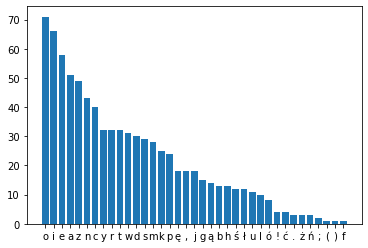

In [93]:
dict_graph(wersja1)

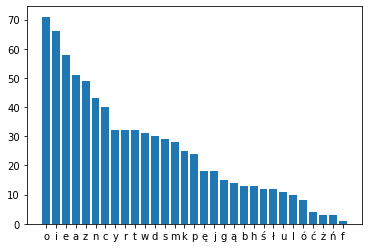

In [94]:
dict_graph(wersja2)